In [3]:
from source.engine import Value
from source import nn
import torch


In [4]:
a= Value(2.0, label='a')
b= Value(3.0, label = 'b')
c=a+b; c.label='c'
d= c+1; d.label='d'
e= d*a; e.label='e'
f= e.tanh()
print(e, f)
# '''
# # print('The children of e are as follows: ')
# # for child in e.children:    
# #     print('\t', child.label, '==>', child.data)
# # print('The operation of e is ', e._op)

# # testing lines
# # topo(e)
# # print([x.label for x in topolist])
# # e.grad=1.0
# # e._backward()
# # print(e.grad)
# # print(d.grad)
# # print(a.grad)
# # d._backward()
# # print(c.grad)
# # print(a.grad)
# # c._backward()
# # print(a.grad)
# '''


# f.backward()
# print(f.grad)
# print(d.grad)
# print(a.grad)

Value(12.0, grad= 0.0) Value(0.9999999999244973, grad= 0.0)


<h1>Trying to use mnisk_NN.csv to train a NN</h1>


In [5]:
import pandas as pd
import numpy as np


In [6]:
df= pd.read_csv('..\\mnisk_NN\\train.csv')
# df.shape
m,n= df.shape
print(m,n)

df.head()

42000 785


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X= df.iloc[:, 1:n+1]
Y= df.iloc[:, 0]
# Y=Y.T
Y.shape




(42000,)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state= 12)
print(f'''      x_train.shape: {x_train.shape}\t\t
      x_test.shape: {x_test.shape}\t\t
      y_train.shape: {y_train.shape}\t\t
      y_test.shape: {y_test.shape}''')

      x_train.shape: (33600, 784)		
      x_test.shape: (8400, 784)		
      y_train.shape: (33600,)		
      y_test.shape: (8400,)


In [9]:
y_train=pd.get_dummies(y_train, dtype= int)
y_test= pd.get_dummies(y_test, dtype= int)
y_train.shape

(33600, 10)

In [10]:

x_train = np.array(x_train)/255
x_test = np.array(x_test)/255
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = [[row for row in temp] for temp in x_train]
x_test = [[row for row in temp] for temp in x_test]
y_train = [[row for row in temp] for temp in y_train]
y_test = [[row for row in temp] for temp in y_test]


In [11]:
len(y_train[0])

10

In [69]:
import torch
x_train= torch.tensor(x_train, dtype=torch.float32)
x_test= torch.tensor(x_test, dtype=torch.float32)
y_train= torch.tensor(y_train, dtype=torch.float32)
y_test= torch.tensor(y_test, dtype=torch.float32)




In [12]:
# the setup is done now lets create a mlp from the module 'nn'
# nn: 784 Input layer nodes, 10 nodes in the hidden layer-1, 10 nodes in output layer(outputs/answers are 0 to 9)
#
mlp=nn.MLP(784,[10,10])
mlp.layers



[Layer of [ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784)],
 Layer of [LinearNeuron(10), LinearNeuron(10), LinearNeuron(10), LinearNeuron(10), LinearNeuron(10), LinearNeuron(10), LinearNeuron(10), LinearNeuron(10), LinearNeuron(10), LinearNeuron(10)]]

In [34]:
epoch= 30
learning_rate= 0.1
losses= []

for _ in range(epoch):
    
    # forward pass
    ypred = [mlp(x) for x in x_train[0:100]]
    ytemp = [[i.tanh() for i in temp] for temp in ypred] 

    loss=Value(0.0)
    count=0
    for i,j in zip(ytemp, y_train[0:100]):
        seList =  [(a-b)**2 for a, b in zip(i,j)]
        current_loss=Value(0.0)
        for i in seList: current_loss += i
        loss += current_loss
    loss= loss*(1/len(ytemp))

    # backward pass
    for p in mlp.parameters():
        p.grad= 0.0         #make previous grad = 0 
        # print('process: backward pass...', end='\r')
    loss.backward()

    # update
    count=0
    for p in mlp.parameters():
        p.data+= -1* learning_rate * p.grad
        count+=1
        # print(f'updating parameters...{count}    ',end='\r')
    
    print(_, loss.data) 
    losses.append(loss.data)
    
print(losses)


0 9.349787523110635
1 9.514152964253919
2 9.396691949613608
3 9.247109533490276
4 9.725406320578454
5 9.265995134698956
6 9.090639249967918
7 9.506721870129123
8 9.01048545834436
9 9.106511024065965
10 9.13220091613998
11 8.797372440770337
12 8.742350671728833
13 8.709932823712963
14 8.673485324501467
15 8.821431161920406
16 8.49232657867395
17 8.652801697275507
18 8.437083538589983
19 8.377931340033976
20 8.1575191291829
21 8.4316915879034
22 8.669018365677612
23 8.325510399603989
24 8.634919535695312
25 8.03431096849233
26 8.120562806629207
27 7.763268697778568
28 7.736786859498268
29 7.834520166120077
[9.349787523110635, 9.514152964253919, 9.396691949613608, 9.247109533490276, 9.725406320578454, 9.265995134698956, 9.090639249967918, 9.506721870129123, 9.01048545834436, 9.106511024065965, 9.13220091613998, 8.797372440770337, 8.742350671728833, 8.709932823712963, 8.673485324501467, 8.821431161920406, 8.49232657867395, 8.652801697275507, 8.437083538589983, 8.377931340033976, 8.15751912

In [35]:
l1      # l1 has losses after trained with 50 rows/entries and 30 epochs
l2= [*losses]       #l2 has losses with 100 rows and 30 epochs


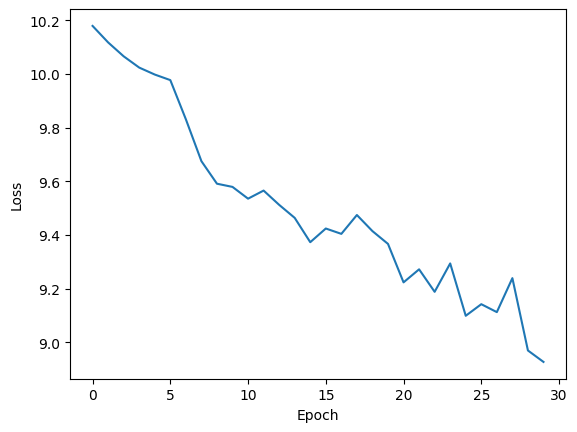

In [36]:
# l1 trained on 50 datasets/ rows and 30 epochs; 
import matplotlib.pyplot as plt
# plt.scatter(y=losses,x=range(len(losses)))
plt.plot(l1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

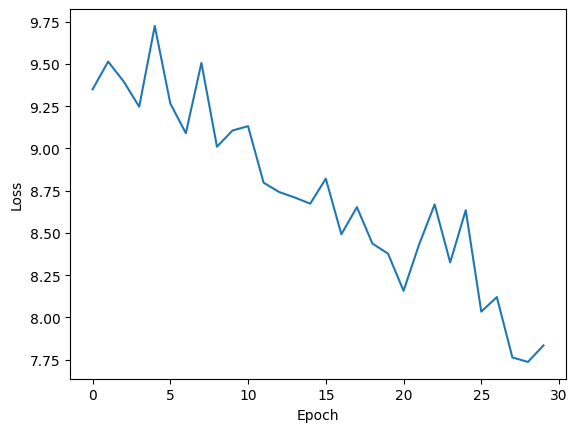

In [37]:
import matplotlib.pyplot as plt
# plt.scatter(y=losses,x=range(len(losses)))
plt.plot(l2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

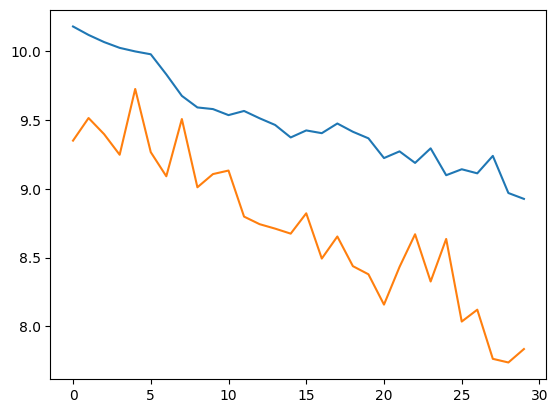

In [43]:
plt.plot(l1)
plt.plot(l2)
plt.show()

In [18]:
def find_max(liOfValues):
    li= []
    for value in liOfValues:
        li.append(value.data) if isinstance(value, Value) else li.append(value)
    return np.argmax(li)


In [22]:
'''making predictions and checking Accuracy'''
import datetime
ti= datetime.datetime.now()
y1pred=[mlp(x) for x in x_test[-100:]]
y1act= y_test[-100:]
trues= 0
falses= 0
for i,j in zip(y1pred, y1act):
    if find_max(i)==find_max(j):trues+=1
    else: falses+=1
    # print(find_max(i)==find_max(j))

print(f'Accuracy : {trues/(trues+falses)}')
tf= datetime.datetime.now()
print('Process Time : ',tf-ti)

Accuracy : 0.05
Process Time :  0:03:33.314790


Accuracy : 0.11
